### Get the HMFs for all sims:

In [2]:
import numpy as np
from gal_goku import hmf as halo_mass_func

for fid in ['L2']:
    base_dir = f'/scratch/06536/qezlou/Goku/FOF/{fid}/narrow/'
    save_File = f'/scratch/06536/qezlou/Goku/processed_data/HMF/{fid}_hmfs_narrow.hdf5'
    hmf = halo_mass_func.Hmf()
    hmf.get_all_fof_hmfs(base_dir=base_dir, save_file=save_File)
    print(f'fid = {fid} is done!')

[ 000000.00 ]   0: 01-10 17:15  Hmf             INFO     Logger initialized at level: 20
[ 000000.00 ]   0: 01-10 17:15  Hmf             INFO     MPI_COMM_WORLD | size = 1 -- Nbkit COMM | size = 1


In [1]:
import numpy as np
from gal_goku import hmf as halo_mass_func
hmf = halo_mass_func.Hmf(logging_level='DEBUG')

counts = np.array([110, 45, 24, 12, 6, 3, 2, 1])
bins = np.arange(len(counts)+1)*0.1
print(bins)
hmf._merge_bins(bins=bins, counts=counts, counts_min=20)

[ 000000.00 ]   0: 01-20 13:08  Hmf             INFO     Logger initialized at level: 10
[ 000000.00 ]   0: 01-20 13:08  Hmf             INFO     MPI_COMM_WORLD | size = 1 -- Nbkit COMM | size = 1
[ 000000.00 ]   0: 01-20 13:08  Hmf             DEBUG    Deleting the last 5 bins of hmf, with counts [12  6  3  2  1]


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
ind =  [3 4 5 6 7]


(array([110,  45,  24,  24]), array([0. , 0.1, 0.2, 0.3, 0.8]))

In [ ]:
if i == 0:
    raise FileNotFoundError(f"HMF all zeros")

## Plot HMFs:

## Comapre fidelities:

2025-01-09 17:12:52.995468: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-09 17:12:53.088435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-01-09 17:12:53.088457: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-01-09 17:12:53.115236: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 17:12:53.560381: W tensorflow/stream_executor/platform/de

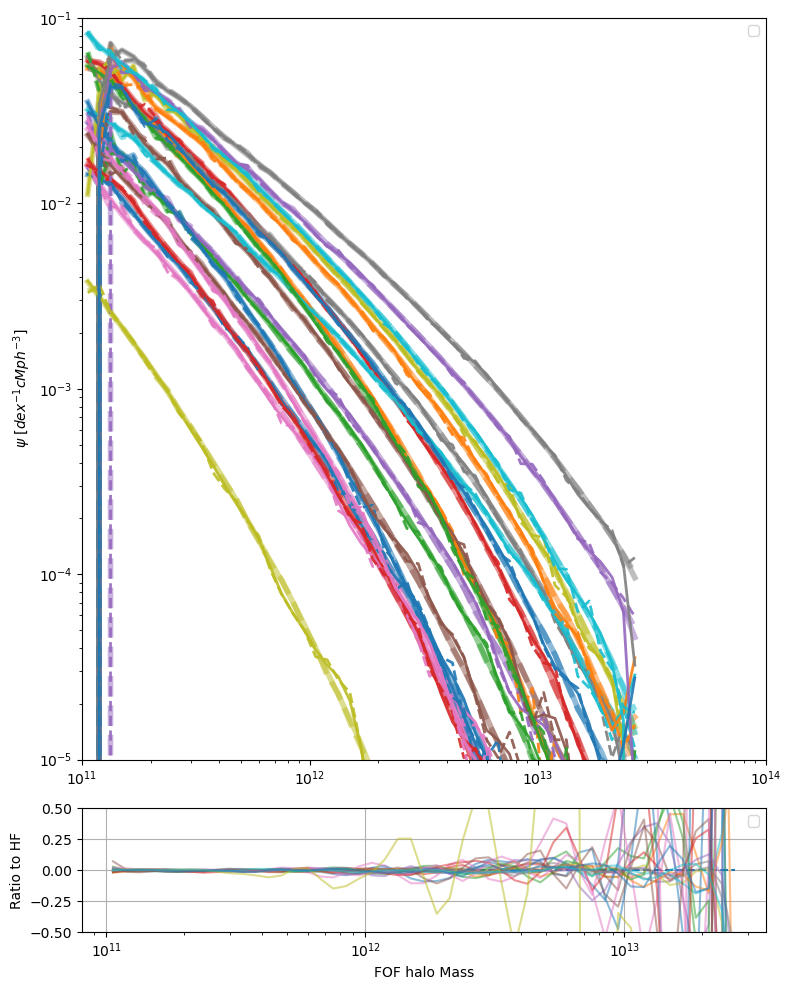

In [1]:
from gal_goku import plot

save_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF'
plt_hmf = plot.PlotHMF(data_dir=save_dir)

plt_hmf.compare_fids(fids=['HF', 'L2'])

## Merged bins:

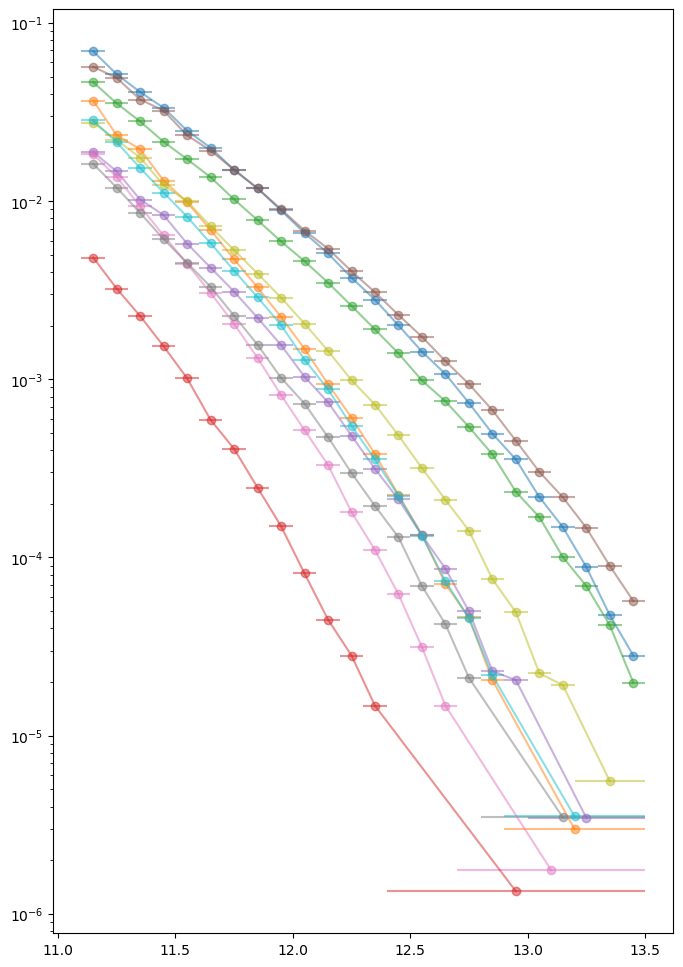

In [26]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

save_file = f'/home/qezlou/HD2/HETDEX/cosmo/data/HMF/merged_bins/L2_hmfs.hdf5'

with h5py.File(save_file, 'r') as f:
    bins = f['bins_coarse'][:]
    hmfs = f['hmfs_coarse'][:]

fig, ax = plt.subplots(figsize=(8, 12))
ind = np.random.choice(len(hmfs), 10, replace=False)
for i in ind:
    mbins = 0.5 * (bins[i][1:] + bins[i][:-1])
    bins_size = bins[i][1:] - bins[i][:-1]
    ax.errorbar(mbins, hmfs[i], xerr=bins_size/2, fmt='o', alpha=0.5, ls='solid')
ax.set_yscale('log')

## Spline interp:

01/20/2025 08:38:30 PM Fitting spline with degree=2, s=None, constraints=True
01/20/2025 08:38:33 PM Fitting spline with degree=2, s=None, constraints=True
01/20/2025 08:38:33 PM Fitting spline with degree=2, s=None, constraints=True


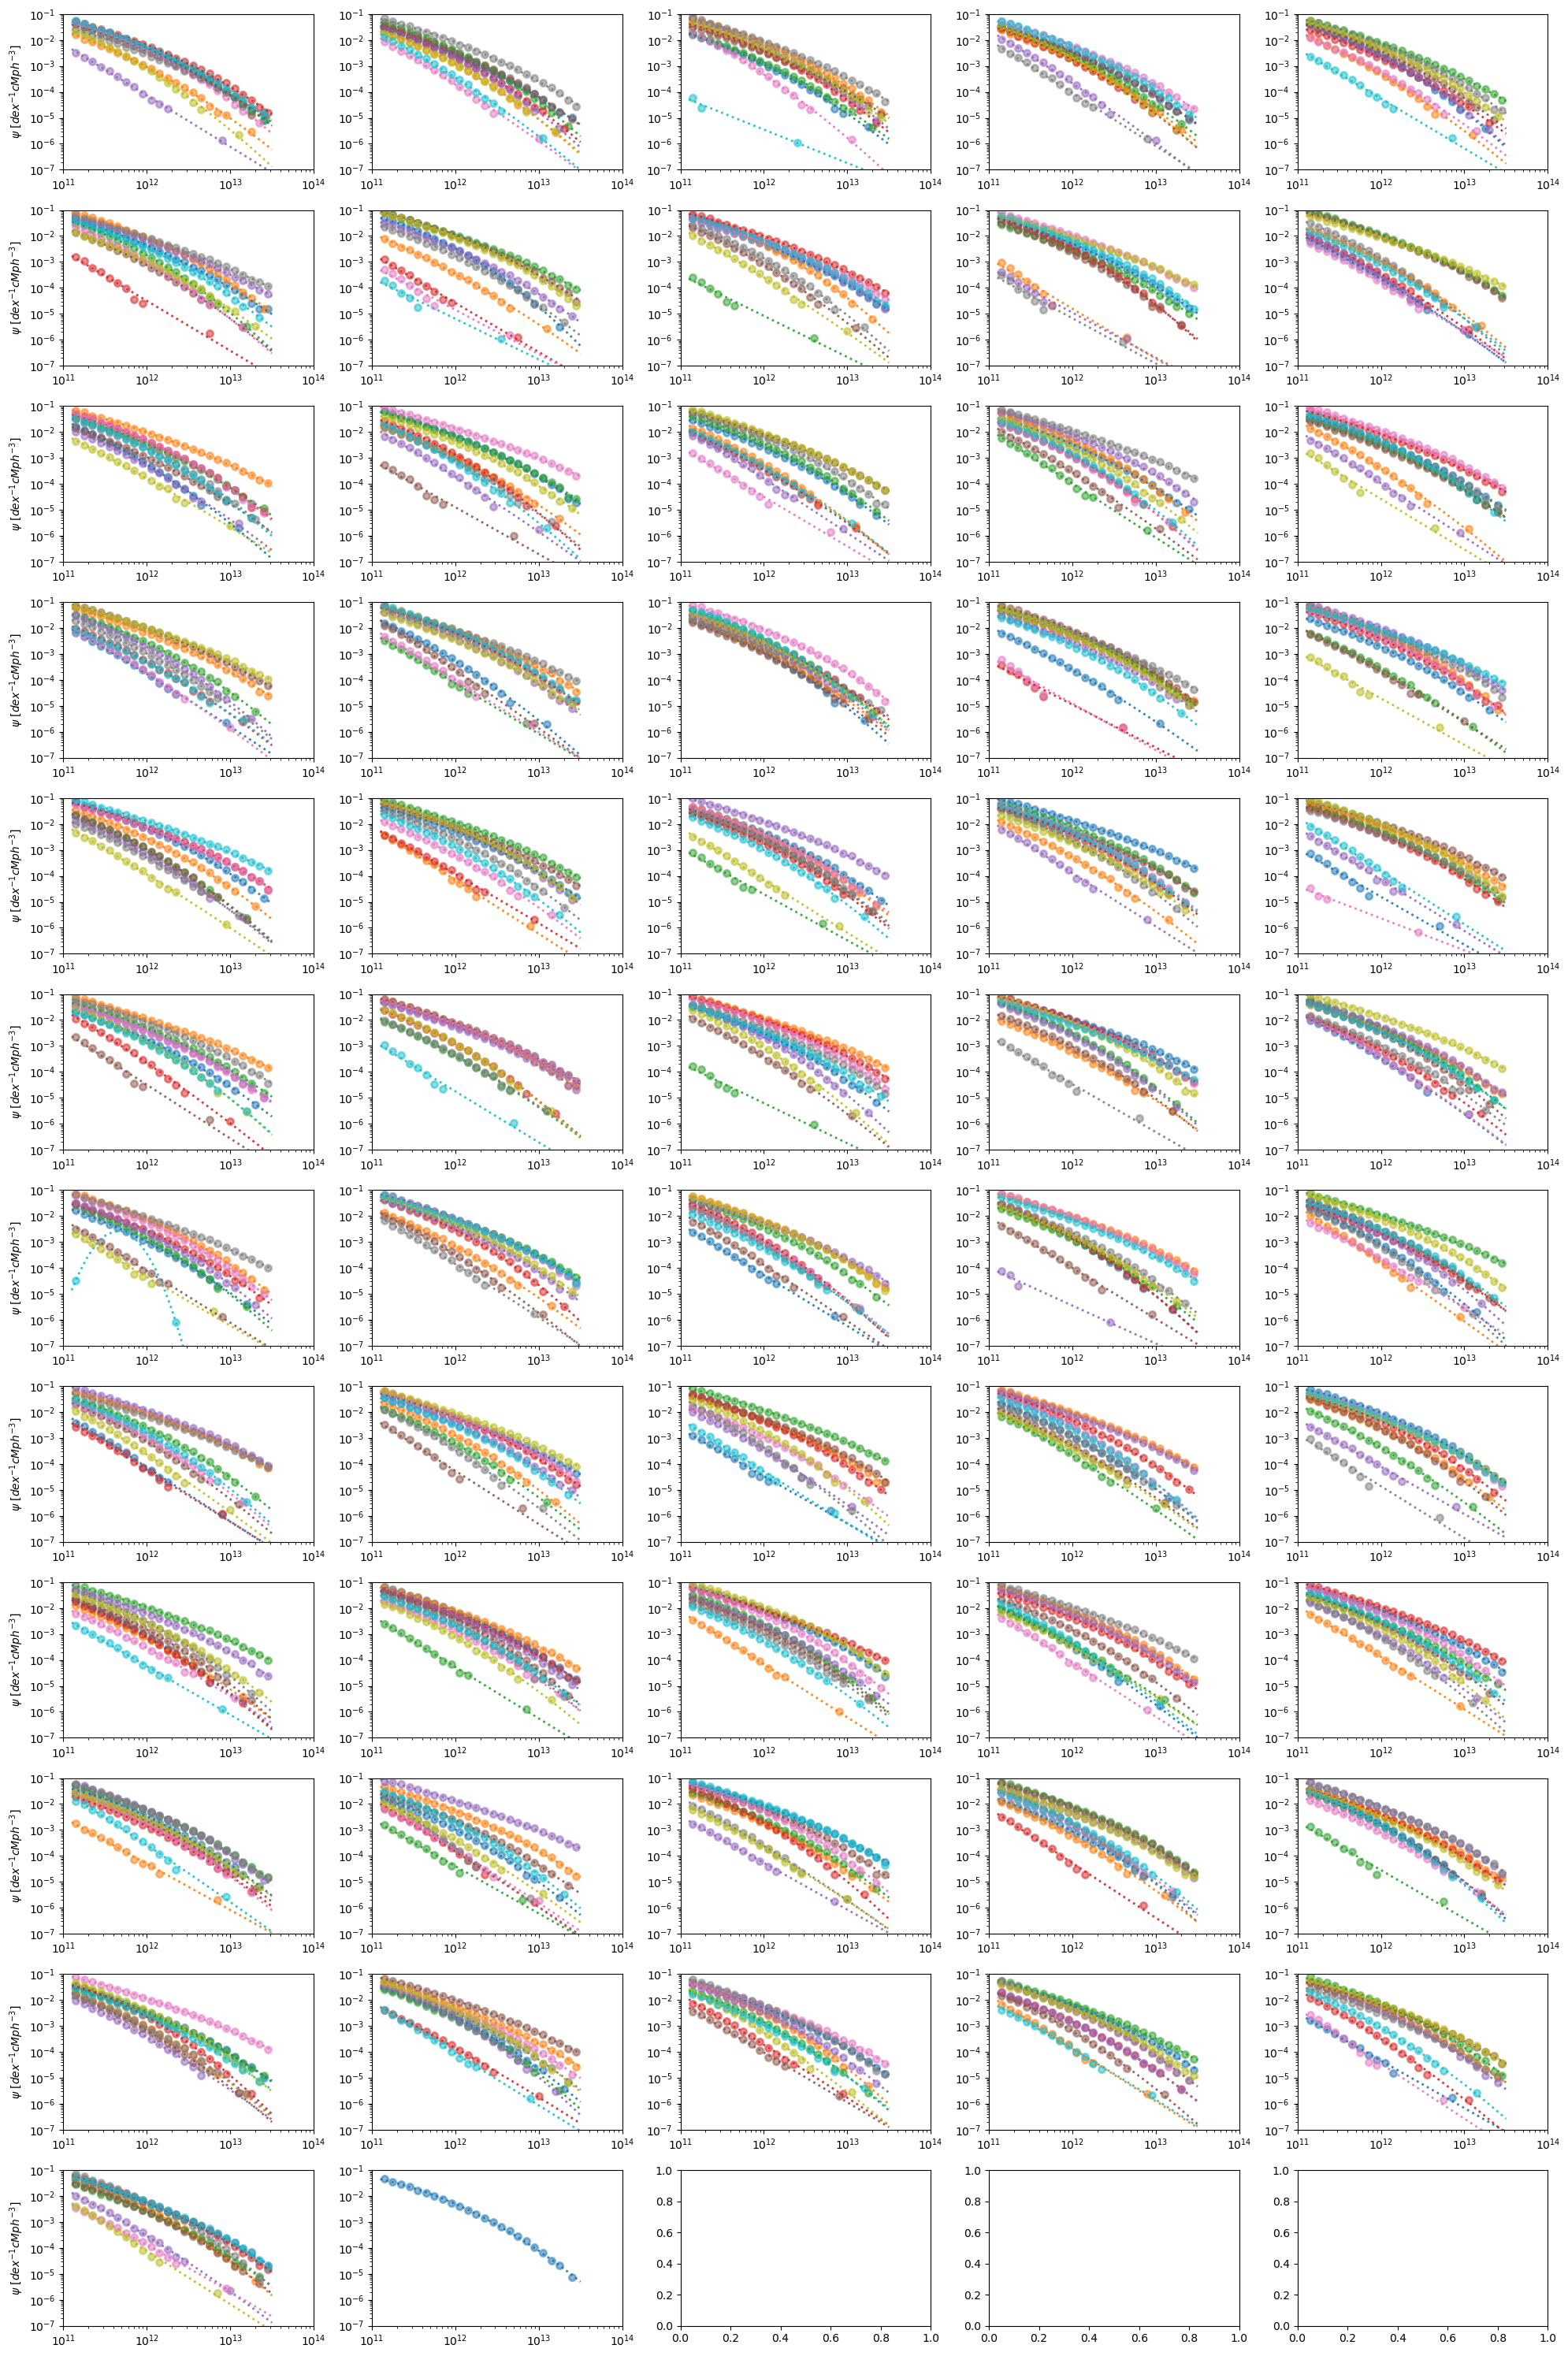

In [1]:
import numpy as np
from gal_goku import plot

data_dir = '/home/qezlou/HD2/HETDEX/cosmo/data/HMF/merged_bins'
plt_hmf = plot.PlotHMF(data_dir=data_dir)
plt_hmf.smoothed(['L2'])


[11.15 11.15 11.15 11.15 11.25 11.35 11.45 11.55 11.65 11.75 11.85 11.95
 12.05 12.15 12.25 12.35 12.45 12.55 12.65 12.75 12.85 12.95 13.05 13.15
 13.25 13.4  13.4  13.4  13.4 ]


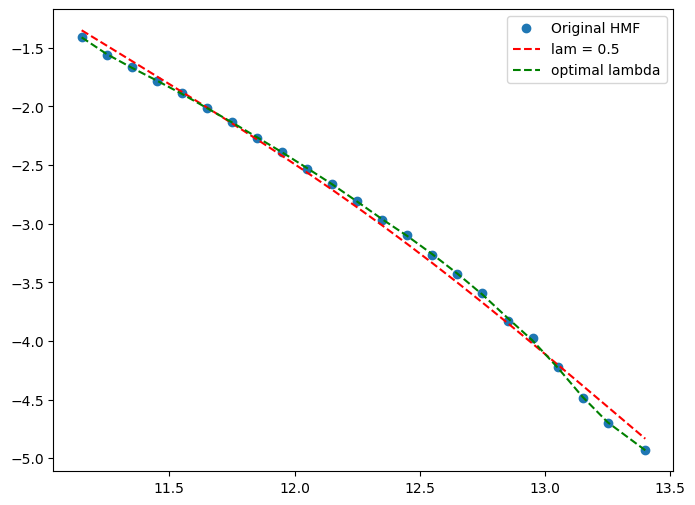

In [43]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
save_file = f'/home/qezlou/HD2/HETDEX/cosmo/data/HMF/merged_bins/L2_hmfs.hdf5'
with h5py.File(save_file, 'r') as f:
    bins = f['bins_coarse'][:]
    hmfs = f['hmfs_coarse'][:]
i = np.random.choice(len(hmfs))
mbins = 0.5 * (bins[i][1:] + bins[i][:-1])

from scipy.interpolate import make_smoothing_spline


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mbins, np.log10(hmfs[i]), 'o', label='Original HMF')
spl = make_smoothing_spline(mbins, np.log10(hmfs[i]), lam=0.5)
ax.plot(mbins, spl(mbins), color='red', ls='--', label='lam = 0.5')
spl = make_smoothing_spline(mbins, np.log10(hmfs[i]), lam=None)
ax.plot(mbins, spl(mbins), color='green', ls='--', label='optimal lambda')
ax.legend()
print(spl.t)

[11.15 11.15 11.15 11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1
 12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.25 13.25 13.25]
[11.15 11.15 11.15 13.25 13.25 13.25]
[11.15 11.15 11.15 13.25 13.25 13.25]


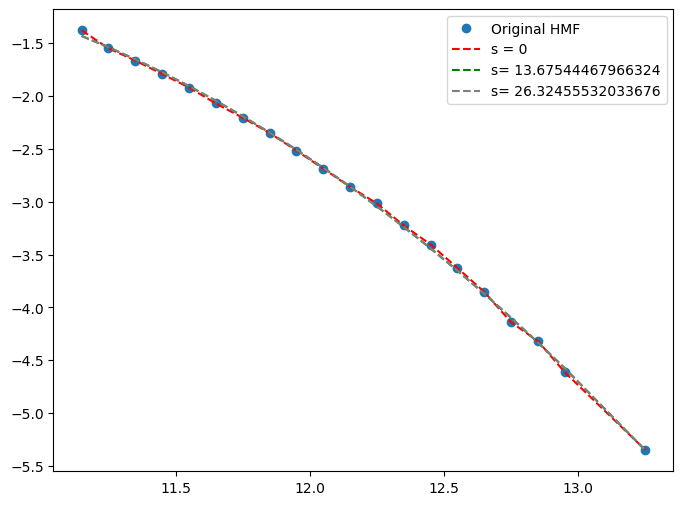

In [69]:
import numpy as np
import h5py
from matplotlib import pyplot as plt
save_file = f'/home/qezlou/HD2/HETDEX/cosmo/data/HMF/merged_bins/L2_hmfs.hdf5'
with h5py.File(save_file, 'r') as f:
    bins = f['bins_coarse'][:]
    hmfs = f['hmfs_coarse'][:]
i = np.random.choice(len(hmfs))
mbins = 0.5 * (bins[i][1:] + bins[i][:-1])

from scipy.interpolate import make_splrep

k = 2
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(mbins, np.log10(hmfs[i]), 'o', label='Original HMF')
spl = make_splrep(mbins, np.log10(hmfs[i]), s=0, k=k)
ax.plot(mbins, spl(mbins), color='red', ls='--', label='s = 0')
print(spl.t)

s = len(mbins) - np.sqrt(2*len(mbins))
spl = make_splrep(mbins, np.log10(hmfs[i]), s=s, k=k)
ax.plot(mbins, spl(mbins), color='green', ls='--', label=f's= {s}')
print(spl.t)

s = len(mbins) + np.sqrt(2*len(mbins))
spl = make_splrep(mbins, np.log10(hmfs[i]), s=s, k=k)
ax.plot(mbins, spl(mbins), color='grey', ls='--', label=f's= {s}')
ax.legend()
print(spl.t)